In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [5]:
np.random.seed(42)

In [7]:
strong_signal = np.random.normal(loc = [10, -30], scale = 
                                
                                [3, 5], size = (50,2)) #strong signal

In [9]:
strong_signal

array([[ 11.49014246, -30.69132151],
       [ 11.94306561, -22.38485072],
       [  9.29753988, -31.17068478],
       [ 14.73763845, -26.16282635],
       [  8.59157684, -27.28719978],
       [  8.60974692, -32.32864877],
       [ 10.72588681, -39.56640122],
       [  4.8252465 , -32.81143765],
       [  6.96150664, -28.42876334],
       [  7.27592777, -37.06151851],
       [ 14.39694631, -31.1288815 ],
       [ 10.20258461, -37.12374093],
       [  8.36685183, -29.44538705],
       [  6.54701927, -28.12150991],
       [  8.19808393, -31.45846875],
       [  8.19488016, -20.73860908],
       [  9.95950833, -35.28855464],
       [ 12.46763474, -36.10421825],
       [ 10.62659079, -39.79835062],
       [  6.01544185, -29.01569382],
       [ 12.21539974, -29.14315859],
       [  9.65305515, -31.50551848],
       [  5.56443403, -33.59922104],
       [  8.61808369, -24.71438887],
       [ 11.03085487, -38.81520078],
       [ 10.97225191, -31.9254114 ],
       [  7.969234  , -26.94161856],
 

In [11]:
medium_signal = np.random.normal(loc = [30, -60], scale = 
                                
                                [5, 8], size = (40,2)) #medium signal

In [13]:
medium_signal

array([[ 22.92314629, -63.36516258],
       [ 28.28642742, -66.41821815],
       [ 29.19357144, -56.76759315],
       [ 39.43092951, -58.6033775 ],
       [ 31.28775195, -60.59556733],
       [ 20.40614392, -60.212111  ],
       [ 30.30115105, -40.2940631 ],
       [ 29.03819518, -57.58762126],
       [ 29.82644115, -69.3494243 ],
       [ 35.71411407, -53.98453574],
       [ 33.95515974, -67.27509964],
       [ 37.01397155, -71.2148085 ],
       [ 32.93428547, -42.47635499],
       [ 25.04731837, -64.53038184],
       [ 30.49825683, -64.02780523],
       [ 22.24668284, -59.4514962 ],
       [ 24.68848143, -56.21126055],
       [ 25.40287883, -47.60052476],
       [ 26.08373354, -62.57649213],
       [ 34.06758609, -69.84691453],
       [ 31.13729967, -49.54285797],
       [ 21.96258383, -58.52292913],
       [ 31.29941397, -53.74541703],
       [ 23.81524645, -70.5636529 ],
       [ 32.60970783, -57.62412261],
       [ 31.25246425, -57.22841432],
       [ 26.59987639, -58.14197042],
 

In [15]:
weak_signal = np.random.normal(loc = [50, -80], scale = 
                                
                                [7, 10], size = (30,2)) #weak signal

In [17]:
weak_signal

array([[ 54.37967143, -88.57157556],
       [ 42.50375251, -75.17527585],
       [ 48.4357605 , -72.85999506],
       [ 53.31266337, -80.72828913],
       [ 44.07244397, -95.14847225],
       [ 46.87439534, -71.43601206],
       [ 51.49865621, -92.45738779],
       [ 51.21226648, -76.1468262 ],
       [ 43.81299795, -78.46274894],
       [ 50.40746103, -91.42970298],
       [ 52.50451152, -74.39215474],
       [ 57.5813587 , -69.46197948],
       [ 40.35631442, -89.3782504 ],
       [ 53.60524687, -74.86214049],
       [ 53.6053338 , -41.47268509],
       [ 53.99623357, -68.6443436 ],
       [ 56.67801234, -73.48608749],
       [ 47.79311529, -72.4103078 ],
       [ 44.5902235 , -82.36818607],
       [ 46.60245517, -79.18125861],
       [ 66.20260997, -98.67265193],
       [ 54.80382133, -96.12715871],
       [ 46.69647694, -69.11049403],
       [ 50.44996013, -90.77744778],
       [ 44.99287404, -73.20402251],
       [ 44.88743358, -77.8354141 ],
       [ 50.31900288, -86.51600348],
 

In [19]:
#need to give criterion for outliers(range)

In [25]:
outliers = np.array([[5, -95],[50, -100], [70,-110], [80, -120], [90,-130]])

In [27]:
outliers


array([[   5,  -95],
       [  50, -100],
       [  70, -110],
       [  80, -120],
       [  90, -130]])

In [29]:
wifi_signals = np.vstack((strong_signal, medium_signal, weak_signal, outliers)) #vstack is to combine

In [31]:
wifi_signals


array([[  11.49014246,  -30.69132151],
       [  11.94306561,  -22.38485072],
       [   9.29753988,  -31.17068478],
       [  14.73763845,  -26.16282635],
       [   8.59157684,  -27.28719978],
       [   8.60974692,  -32.32864877],
       [  10.72588681,  -39.56640122],
       [   4.8252465 ,  -32.81143765],
       [   6.96150664,  -28.42876334],
       [   7.27592777,  -37.06151851],
       [  14.39694631,  -31.1288815 ],
       [  10.20258461,  -37.12374093],
       [   8.36685183,  -29.44538705],
       [   6.54701927,  -28.12150991],
       [   8.19808393,  -31.45846875],
       [   8.19488016,  -20.73860908],
       [   9.95950833,  -35.28855464],
       [  12.46763474,  -36.10421825],
       [  10.62659079,  -39.79835062],
       [   6.01544185,  -29.01569382],
       [  12.21539974,  -29.14315859],
       [   9.65305515,  -31.50551848],
       [   5.56443403,  -33.59922104],
       [   8.61808369,  -24.71438887],
       [  11.03085487,  -38.81520078],
       [  10.97225191,  -

In [35]:
scaler = StandardScaler()
wifi_signals_scaled = scaler.fit_transform(wifi_signals)

In [37]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
labels = dbscan.fit_predict(wifi_signals_scaled)

In [39]:
core_samples_mask = np.zeros_like(labels, dtype=bool)

In [41]:
core_samples_mask[dbscan.core_sample_indices_] = True

In [47]:
plt.figure(figsize=(12,7))


<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

In [57]:
unique_labels = set(labels)
colors = plt.cm.viridis(np.linspace(0,1, len(unique_labels)))

In [61]:
for label, color in zip(unique_labels, colors):
    cluster_points = wifi_signals[labels == label]

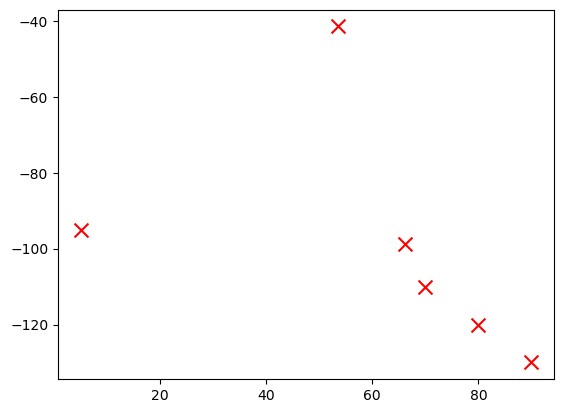

In [65]:
if label == -1:
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c ='red', marker = 'x', s = 100, label = 'outliers(dead zones)')

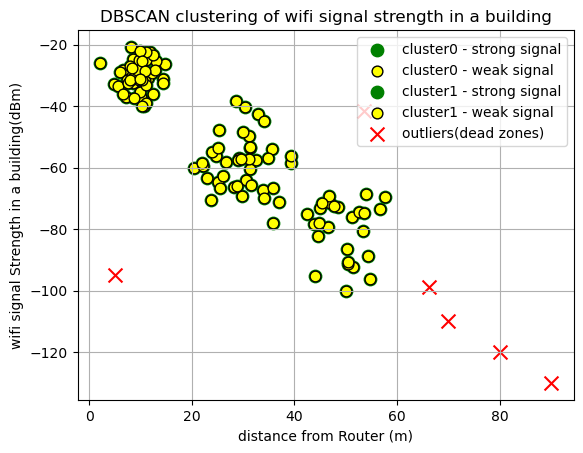

In [93]:
for label, color in zip(unique_labels, colors):
    cluster_points = wifi_signals[labels == label]
    if label == -1:
        plt.scatter(cluster_points[:,0], cluster_points[:,1], c ='red', marker = 'x', s = 100, label = 'outliers(dead zones)')
    else:
        core_points = cluster_points[core_samples_mask[labels == label]]
        plt.scatter(core_points[:,0],core_points[:,1],c='green', s = 80, label = f"cluster{label} - strong signal")
        border_points = cluster_points[core_samples_mask[labels == label]]
        plt.scatter(border_points[:,0],border_points[:,1],c='yellow', s = 60, edgecolors = 'black', label = f"cluster{label} - weak signal")
        #give legends
plt.xlabel("distance from Router (m)")
plt.ylabel("wifi signal Strength in a building(dBm)")
plt.title("DBSCAN clustering of wifi signal strength in a building")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()